# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutant_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')

/home/yanathan/Projects/GSDMA/utils/io.py:476: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:476: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbon', 'pollutant': 'vs'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbon', 'pollutant': 'vr'}
{'lithology': 'dolomie', 'pollutant': 'vs'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbon', 'pollutant': 'vr'}
{'lithology': 'dolomie', 'pollutant': 'vi'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbo

In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne', 'pollutant': 'vs'}),
 1: Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 2: Component({'lithology': 'argile', 'pollutant': 'vr'}),
 3: Component({'lithology': 'sable', 'pollutant': 'vi'}),
 4: Component({'lithology': 'dolomie', 'pollutant': 'vs'}),
 5: Component({'lithology': 'sable', 'pollutant': 'vs'}),
 6: Component({'lithology': 'argile', 'pollutant': 'vs'}),
 7: Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 8: Component({'lithology': 'dolomie', 'pollutant': 'vi'}),
 9: Component({'lithology': 'argile', 'pollutant': 'vi'}),
 10: Component({'lithology': 'marne', 'pollutant': 'vr'}),
 11: Component({'lithology': 'sable', 'pollutant': 'vr'}),
 12: Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 13: Component({'lithology': 'schiste'}),
 14: Component({'lithology': 'dolomie', 'pollutant': 'vr'}),
 15: Component({'lithology': 'calcaire'}),
 16: Component({'lithology': 'marne', 'pollutant': 'vi'})}

In [11]:
len(boreholes), len(components)

(10, 17)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-06-29 16:18:30,988 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-29 16:18:30,990 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-06-29 16:18:30,990 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-29 16:18:30,992 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-06-29 16:18:30,993 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-29 16:18:30,994 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-06-29 16:18:30,995 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-29 16:18:30,996 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-06-29 16:18:30,997 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-29 16:18:30,998 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-06-29 16:18:30,998 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-29 16:18:30,999 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-06-29 16:18:31,000 INFO sqlalchemy.engine.Engine 

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

In [16]:
p = Project(session, legend_dict={'lithology':lithology_memoris, 'pollutant':pollutant_memoris}, 
            lexicon=lexicon_memoris, repr_attribute='lithology')

p.add_components(components)

2021-06-29 16:18:31,046 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-29 16:18:31,048 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-29 16:18:31,049 INFO sqlalchemy.engine.Engine [generated in 0.00087s] ()
2021-06-29 16:18:31,054 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-06-29 16:18:31,054 INFO sqlalchemy.engine.Engine [generated in 0.00086s] ((0, 'Marne, vs'), (1, 'Charbon, vs'), (2, 'Argile, vr'), (3, 'Sable, vi'), (4, 'Dolomie, vs'), (5, 'Sable, vs'), (6, 'Argile, vs'), (7, 'Charbon, vr')  ... displaying 10 of 17 total bound parameter sets ...  (15, 'Calcaire'), (16, 'Marne, vi'))
2021-06-29 16:18:31,057 INFO sqlalchemy.engine.Engine COMMIT
2021-06-29 16:18:31,060 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-29 16:18:31,061 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "B

Add boreholes into the project

In [17]:
for bh in boreholes:
    p.add_borehole(bh)

2021-06-29 16:18:31,069 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-29 16:18:31,070 INFO sqlalchemy.engine.Engine [generated in 0.00112s] ('BH001', 28.0, 0.43)
2021-06-29 16:18:31,072 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-29 16:18:31,073 INFO sqlalchemy.engine.Engine [generated in 0.00070s] ((0, 0.0, 0.0, 0.0, 152600.0, 121039.0), (1, 4.0, 4.0, 4.0, 152600.0, 121039.0), (2, 4.0, 4.0, 4.0, 152600.0, 121039.0), (3, 8.0, 8.0, 8.0, 152600.0, 121039.0), (4, 8.0, 8.0, 8.0, 152600.0, 121039.0), (5, 20.0, 20.0, 20.0, 152600.0, 121039.0), (6, 20.0, 20.0, 20.0, 152600.0, 121039.0), (7, 28.0, 28.0, 28.0, 152600.0, 121039.0))
2021-06-29 16:18:31,076 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-29 16:18:31,076 INFO sqlalchemy.engine.Engine [generated in 0.0

2021-06-29 16:18:31,146 INFO sqlalchemy.engine.Engine [cached since 0.0485s ago] (9,)
2021-06-29 16:18:31,149 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,150 INFO sqlalchemy.engine.Engine [cached since 0.05579s ago] (10,)
2021-06-29 16:18:31,152 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,153 INFO sqlalchemy.engine.Engine [cached since 0.05541s ago] (11,)
2021-06-29 16:18:31,155 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_

2021-06-29 16:18:31,213 INFO sqlalchemy.engine.Engine [cached since 0.1181s ago] (24,)
2021-06-29 16:18:31,215 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,215 INFO sqlalchemy.engine.Engine [cached since 0.1177s ago] (25,)
2021-06-29 16:18:31,217 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,218 INFO sqlalchemy.engine.Engine [cached since 0.1232s ago] (26,)
2021-06-29 16:18:31,219 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-29 16:18:31,288 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-29 16:18:31,289 INFO sqlalchemy.engine.Engine [cached since 0.2133s ago] ((19, 'BH005', 0, 'Sable VS', 38, 39), (20, 'BH005', 1, 'Argile VI', 40, 41), (21, 'BH005', 2, 'Marne VS', 42, 43), (22, 'BH005', 3, 'Charbon VS', 44, 45), (23, 'BH005', 4, 'Dolomie VS', 46, 47), (24, 'BH005', 5, 'Schiste Cl', 48, 49))
2021-06-29 16:18:31,291 INFO sqlalchemy.engine.Engine COMMIT
2021-06-29 16:18:31,294 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-29 16:18:31,295 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-29 16:18:31,295 INFO sqlalchemy.engine.Engine [cached since 0.2472s ago] ()
2021-06-29 16:18:31,298 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Inter

2021-06-29 16:18:31,358 INFO sqlalchemy.engine.Engine [cached since 0.2687s ago] ('BH006',)
2021-06-29 16:18:31,360 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,360 INFO sqlalchemy.engine.Engine [cached since 0.2661s ago] (50,)
2021-06-29 16:18:31,362 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,362 INFO sqlalchemy.engine.Engine [cached since 0.2646s ago] (51,)
2021-06-29 16:18:31,364 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positi

2021-06-29 16:18:31,423 INFO sqlalchemy.engine.Engine [cached since 0.3282s ago] (64,)
2021-06-29 16:18:31,424 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,425 INFO sqlalchemy.engine.Engine [cached since 0.3276s ago] (65,)
2021-06-29 16:18:31,427 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,427 INFO sqlalchemy.engine.Engine [cached since 0.333s ago] (66,)
2021-06-29 16:18:31,429 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-06-29 16:18:31,487 INFO sqlalchemy.engine.Engine [cached since 0.3897s ago] (79,)
2021-06-29 16:18:31,489 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,490 INFO sqlalchemy.engine.Engine [cached since 0.3954s ago] (80,)
2021-06-29 16:18:31,491 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-29 16:18:31,492 INFO sqlalchemy.engine.Engine [cached since 0.3942s ago] (81,)
2021-06-29 16:18:31,505 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, 

2021-06-29 16:18:31,565 INFO sqlalchemy.engine.Engine COMMIT
2021-06-29 16:18:31,569 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-29 16:18:31,571 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-29 16:18:31,572 INFO sqlalchemy.engine.Engine [cached since 0.5237s ago] ()
2021-06-29 16:18:31,575 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-29 16:18:31,576 INFO sqlalchemy.engine.Engine [cached since 0.4863s ago] ('BH10',)
2021-06-29 16:18:31,579 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions

In [18]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-06-29 16:18:31,615 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-06-29 16:18:31,617 INFO sqlalchemy.engine.Engine [generated in 0.00189s] ((0, 3, ''), (1, 2, ''), (2, 0, ''), (3, 1, ''), (4, 5, ''), (5, 6, ''), (6, 0, ''), (7, 7, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 10, ''), (49, 12, ''))
2021-06-29 16:18:31,620 INFO sqlalchemy.engine.Engine COMMIT
2021-06-29 16:18:31,625 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-29 16:18:31,626 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-29 16:18:31,627 INFO sqlalchemy.engine.Engine [cached since 0.5788s ago] ()


In [19]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-06-29 16:18:31,634 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [20]:
p.boreholes

2021-06-29 16:18:31,642 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-29 16:18:31,643 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-29 16:18:31,644 INFO sqlalchemy.engine.Engine [generated in 0.00085s] ('BH001',)
2021-06-29 16:18:31,646 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-29 16:18:31,646 INFO sqlalchemy.engine.Engine [cached since 0.5565s ago] ('BH001',)
2021-06-29 16:18:31,648 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [21]:
p.refresh(verbose=False)

2021-06-29 16:18:31,696 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-29 16:18:31,698 INFO sqlalchemy.engine.Engine [cached since 0.6493s ago] ()


In [22]:
session.close()

2021-06-29 16:18:31,704 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

## Display one object

In [23]:
p.update_legend_cmap(update_legend=True)

sable
argile
marne
charbon
BH001 : ['sable', 'argile', 'marne', 'charbon']
sable
argile
marne
charbon
dolomie
BH002 : ['sable', 'argile', 'marne', 'charbon', 'dolomie']
sable
argile
marne
charbon
dolomie
BH003 : ['sable', 'argile', 'marne', 'charbon', 'dolomie']
sable
argile
marne
charbon
dolomie
BH004 : ['sable', 'argile', 'marne', 'charbon', 'dolomie']
sable
argile
marne
charbon
dolomie
schiste
BH005 : ['sable', 'argile', 'marne', 'charbon', 'dolomie', 'schiste']
sable
argile
marne
charbon
dolomie
BH006 : ['sable', 'argile', 'marne', 'charbon', 'dolomie', 'schiste']
sable
argile
marne
charbon
dolomie
calcaire
BH007 : ['sable', 'argile', 'marne', 'charbon', 'dolomie', 'schiste', 'calcaire']
sable
argile
marne
charbon
dolomie
BH008 : ['sable', 'argile', 'marne', 'charbon', 'dolomie', 'schiste', 'calcaire']
sable
argile
marne
charbon
dolomie
BH009 : ['sable', 'argile', 'marne', 'charbon', 'dolomie', 'schiste', 'calcaire']
sable
argile
marne
charbon
BH10 : ['sable', 'argile', 'marne', 'c

(Legend(Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
 Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})})
 Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})})
 Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})})
 Decor({'_colour': '#fdaaff', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})})
 Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schiste'})})
 Decor({'_colour': '#149eff', 'width': 3, 'hatch': "'='", 'component': Component({'lithology': 'calcaire'})})),
 <matplotlib.colors.ListedColormap at 0x7f832b80f280>)

In [24]:
bh = 0
p.boreholes_3d[bh].components

[Component({'lithology': 'marne', 'pollutant': 'vs'}),
 Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 Component({'lithology': 'argile', 'pollutant': 'vr'}),
 Component({'lithology': 'sable', 'pollutant': 'vi'})]

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


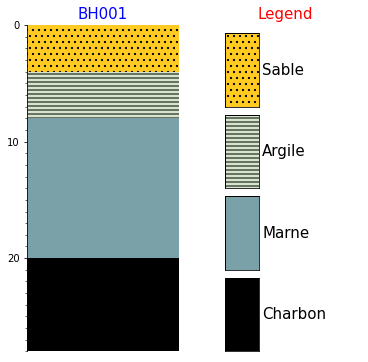

In [25]:
p.boreholes_3d[bh].plot2d()

In [26]:
p.boreholes_3d[bh].plot3d()

Colormap computing ...


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

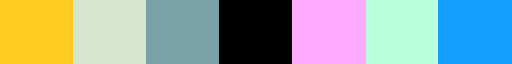

In [27]:
p.cmap

In [28]:
p.legend_dict['pollutant']

Legend(Decor({'_colour': '#00ff00', 'width': None, 'component': Component({'pollutant': 'vr'}), 'hatch': None})
Decor({'_colour': '#ffa500', 'width': None, 'component': Component({'pollutant': 'vs'}), 'hatch': None})
Decor({'_colour': '#ff0000', 'width': None, 'component': Component({'pollutant': 'vi'}), 'hatch': None})
Decor({'_colour': '#ffffff', 'width': None, 'component': Component({'pollutant': 'inconnu'}), 'hatch': None}))

vi
vr
vs
vs
BH001 : ['vi', 'vr', 'vs']
vs
vs
vs
vr
vs
BH002 : ['vi', 'vr', 'vs']
vs
vi
vs
vr
vi
BH003 : ['vi', 'vr', 'vs']
vr
vi
vr
vi
vi
BH004 : ['vi', 'vr', 'vs']
vs
vi
vs
vs
vs
Inconnu
BH005 : ['vi', 'vr', 'vs', 'Inconnu']
vi
vi
vr
vr
vr
BH006 : ['vi', 'vr', 'vs', 'Inconnu']
vr
vr
vs
vs
vs
Inconnu
BH007 : ['vi', 'vr', 'vs', 'Inconnu']
vr
vi
vi
vi
vs
BH008 : ['vi', 'vr', 'vs', 'Inconnu']
vr
vi
vi
vr
vr
BH009 : ['vi', 'vr', 'vs', 'Inconnu']
vi
vi
vr
vi
BH10 : ['vi', 'vr', 'vs', 'Inconnu']
vr
['vr']
vs
['vs']
vi
['vi']
inconnu
['Inconnu']


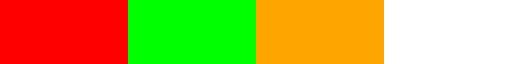

In [29]:
p.update_legend_cmap(repr_attribute='pollutant')[1] #legend=lithology_memoris, update_legend=False)[0]

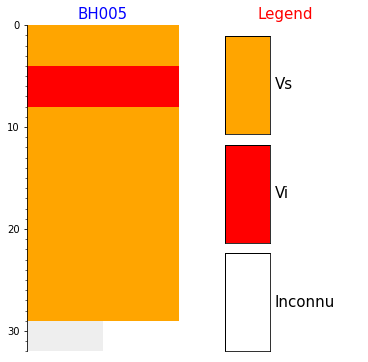

In [30]:
p.boreholes_3d[4].plot2d(repr_attribute='pollutant', repr_legend=pollutant_memoris)

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


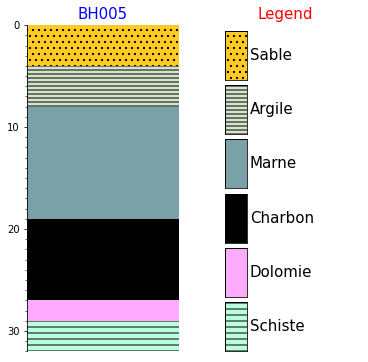

In [31]:
p.boreholes_3d[4].plot2d(repr_attribute='lithology')#, repr_legend=pollutant_memoris)

### Display project boreholes

In [32]:
p.plot3d(repr_attribute='pollutant', labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

Colormap computing ...
vi
vr
vs
vs
BH001 : ['vi', 'vr', 'vs']
vs
vs
vs
vr
vs
BH002 : ['vi', 'vr', 'vs']
vs
vi
vs
vr
vi
BH003 : ['vi', 'vr', 'vs']
vr
vi
vr
vi
vi
BH004 : ['vi', 'vr', 'vs']
vs
vi
vs
vs
vs
Inconnu
BH005 : ['vi', 'vr', 'vs', 'Inconnu']
vi
vi
vr
vr
vr
BH006 : ['vi', 'vr', 'vs', 'Inconnu']
vr
vr
vs
vs
vs
Inconnu
BH007 : ['vi', 'vr', 'vs', 'Inconnu']
vr
vi
vi
vi
vs
BH008 : ['vi', 'vr', 'vs', 'Inconnu']
vr
vi
vi
vr
vr
BH009 : ['vi', 'vr', 'vs', 'Inconnu']
vi
vi
vr
vi
BH10 : ['vi', 'vr', 'vs', 'Inconnu']
vr
['vr']
vs
['vs']
vi
['vi']
inconnu
['Inconnu']


### Boreholes in 3D using X3D for interaction within the notebook